In [ ]:
!pip install pycaret

In [ ]:
from pycaret.regression import *
import pandas as pd
import numpy as np
from pycaret.datasets import *

In [ ]:
e1 = RegressionExperiment()

In [ ]:
data = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
train_data = data.sample(frac=0.9)
test_data = data.drop(train_data.index)

In [ ]:
len(train_data)

15641

In [ ]:
len(test_data)

1738

In [ ]:
categoricals = ['season', 'yr', 'mnth', 'hr','holiday', 'weekday','workingday','weathersit' ]
numericals   = ['temp', 'atemp', 'hum', 'windspeed']
ignore       = ['instant','dteday']

In [ ]:
e1.setup(data=train_data,target='cnt',train_size=0.7,categorical_features=categoricals,numeric_features=numericals,ignore_features=ignore)

,Description,Value
0,Session id,8836
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(15641, 15)"
4,Transformed data shape,"(15641, 59)"
5,Transformed train set shape,"(10948, 59)"
6,Transformed test set shape,"(4693, 59)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [ ]:
top3 = e1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31.9834,2298.1150,47.8762,0.9294,0.5429,0.6438,1.5200
et,Extra Trees Regressor,29.0557,2337.7540,48.2770,0.9282,0.3973,0.3917,10.0950
xgboost,Extreme Gradient Boosting,32.0024,2367.7751,48.6047,0.9273,0.5439,0.6413,0.7740
rf,Random Forest Regressor,33.9363,2918.5893,53.9715,0.9104,0.4924,0.5860,7.4950
dt,Decision Tree Regressor,45.1364,5807.4644,76.1440,0.8215,0.5982,0.6294,0.5800
gbr,Gradient Boosting Regressor,59.4553,6795.1017,82.4024,0.7912,0.8062,1.4615,2.0020
ridge,Ridge Regression,75.8956,10439.6125,102.1541,0.6791,1.0298,2.8101,0.2810
br,Bayesian Ridge,75.8882,10438.9574,102.1509,0.6791,1.0296,2.8082,0.4110
lr,Linear Regression,75.9309,10455.7267,102.2344,0.6786,1.0279,2.7938,1.1320
knn,K Neighbors Regressor,70.3471,10702.5884,103.3392,0.6716,0.9287,2.1206,0.5270


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [ ]:
top3

[LGBMRegressor(n_jobs=-1, random_state=8836),
 ExtraTreesRegressor(n_jobs=-1, random_state=8836),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=8836, ...)]

In [ ]:
xgboost = e1.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30.2712,2208.6574,46.9964,0.9331,0.5719,0.7736
1,31.3605,2107.7200,45.9099,0.9303,0.5676,0.6315
2,32.2251,2318.9463,48.1554,0.9282,0.5675,0.6129
3,31.1213,2126.3093,46.1119,0.9314,0.5332,0.5866
4,30.8408,2029.1391,45.0460,0.9381,0.5311,0.5760
5,32.7834,2612.5600,51.1132,0.9219,0.5315,0.6220
6,32.9625,2572.6532,50.7213,0.9241,0.4919,0.5610
7,32.8038,2551.2407,50.5098,0.9248,0.5788,0.7209
8,32.0656,2498.2740,49.9827,0.9239,0.5571,0.7167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgb = e1.tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.8479,1734.7284,41.6501,0.9475,0.4826,0.5349
1,28.9356,1911.7113,43.7231,0.9368,0.4941,0.5195
2,30.4352,2145.2135,46.3164,0.9336,0.5050,0.5792
3,29.7139,1995.1934,44.6676,0.9356,0.4813,0.5058
4,28.6200,1798.2006,42.4052,0.9452,0.4640,0.4604
5,30.1400,2323.5778,48.2035,0.9305,0.4638,0.4731
6,30.5420,2237.3195,47.3003,0.9340,0.4969,0.5301
7,31.0195,2367.6074,48.6581,0.9302,0.5158,0.6022
8,29.7295,2181.9040,46.7109,0.9335,0.5054,0.5872


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


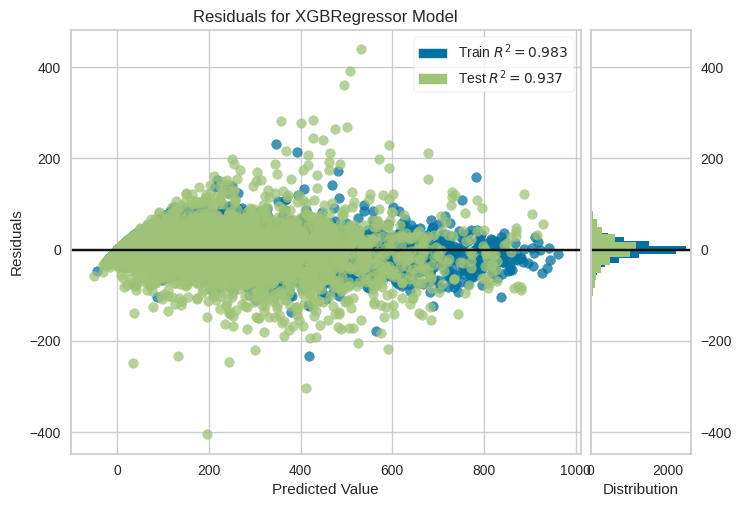

In [ ]:
e1.plot_model(tuned_xgb)

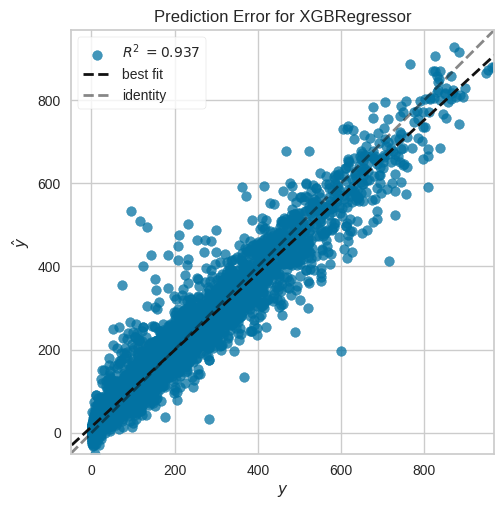

In [ ]:
e1.plot_model(tuned_xgb,plot='error')

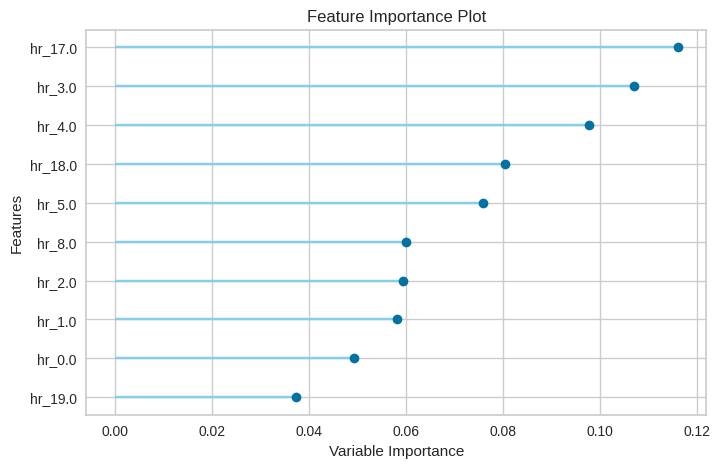

In [ ]:
e1.plot_model(tuned_xgb,plot='feature')

In [ ]:
e1.plot_model(tuned_xgb,plot='parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.7
device,cpu
early_stopping_rounds,None
enable_categorical,False


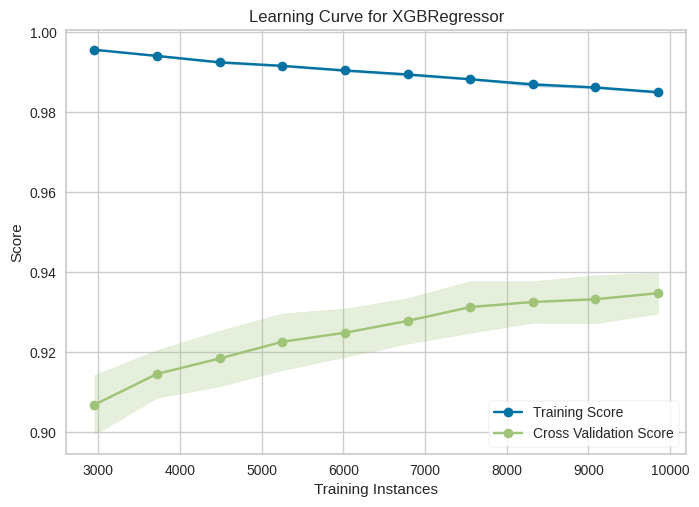

In [ ]:
e1.plot_model(tuned_xgb,plot='learning')

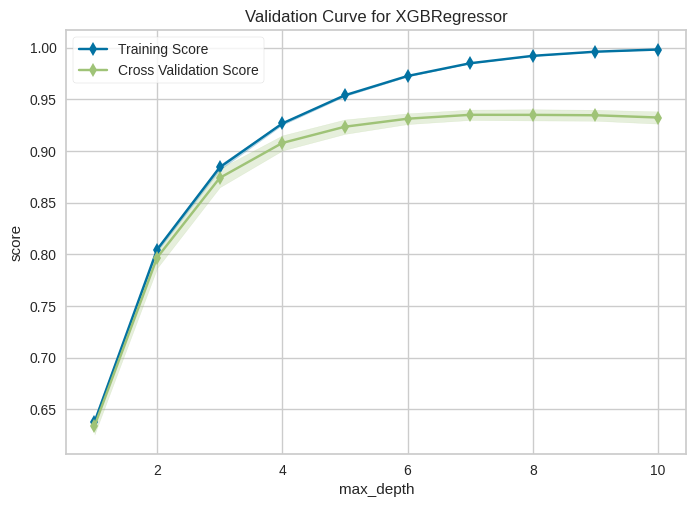

In [ ]:
e1.plot_model(tuned_xgb,plot='vc')

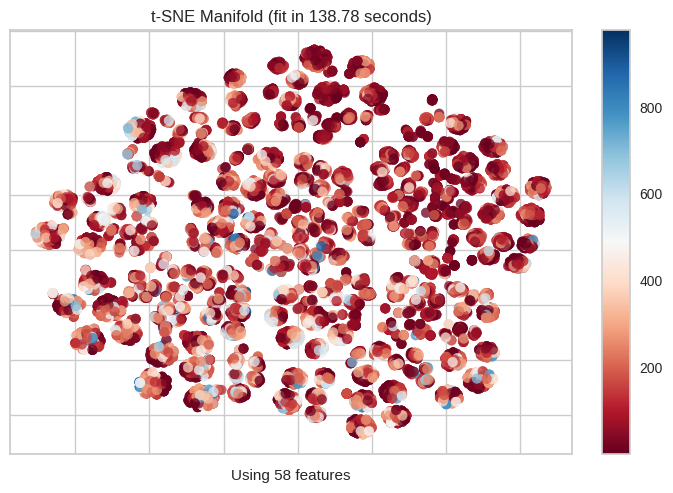

In [ ]:
e1.plot_model(tuned_xgb,plot='manifold')

In [ ]:
lr = e1.create_model('lr',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,76.2763,10582.4425,102.8710,0.6657,1.0841,3.4670
1,75.2288,10309.3018,101.5347,0.6743,1.0145,2.6997
2,75.7977,10575.5078,102.8373,0.6807,0.9713,2.4146
3,78.0640,10871.1622,104.2649,0.6796,1.0595,2.8594
4,75.4201,10274.2384,101.3619,0.6840,1.0196,2.6244
Mean,76.1574,10522.5305,102.5740,0.6768,1.0298,2.8130
Std,1.0183,216.8204,1.0551,0.0064,0.0390,0.3569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
e1.evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
dt = e1.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.8256,5292.3918,72.7488,0.8398,0.5939,0.6392
1,46.9644,5992.4365,77.4108,0.8020,0.6062,0.5773
2,46.2795,6044.1315,77.7440,0.8129,0.6321,0.7474
3,44.0091,4947.0868,70.3355,0.8404,0.5778,0.5463
4,44.5443,6130.4420,78.2971,0.8130,0.6014,0.6604
5,43.0817,5273.4185,72.6183,0.8423,0.5456,0.4915
6,44.9251,6217.9900,78.8542,0.8165,0.6097,0.5947
7,45.2064,5636.1854,75.0745,0.8338,0.6565,0.7834
8,47.5183,6105.3026,78.1364,0.8140,0.6224,0.7954


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
bagged_dt = e1.ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.3211,2965.1478,54.4532,0.9103,0.5283,0.6735
1,35.8252,3122.6670,55.8808,0.8968,0.4827,0.5360
2,37.6079,3656.0370,60.4652,0.8868,0.5176,0.6073
3,33.8284,2913.5784,53.9776,0.9060,0.4592,0.4932
4,35.4774,3170.2035,56.3046,0.9033,0.5139,0.6124
5,36.8746,3578.7421,59.8226,0.8930,0.4771,0.5095
6,36.0505,3343.2664,57.8210,0.9014,0.5020,0.6092
7,36.9380,3424.3562,58.5180,0.8990,0.5354,0.6837
8,37.8037,3683.0276,60.6880,0.8878,0.5398,0.7219


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_dt = e1.ensemble_model(dt,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.1553,2724.9050,52.2006,0.9175,0.4425,0.4570
1,32.6466,2613.5799,51.1232,0.9136,0.4266,0.4029
2,33.8557,3416.4968,58.4508,0.8942,0.4364,0.4350
3,33.1817,2955.8886,54.3681,0.9046,0.4055,0.3844
4,33.0849,2951.1708,54.3247,0.9100,0.4231,0.4065
5,34.2064,3305.2804,57.4916,0.9011,0.4137,0.3796
6,33.9598,3160.2776,56.2163,0.9068,0.4595,0.4858
7,32.5374,2883.9253,53.7022,0.9149,0.4423,0.4568
8,35.3757,3843.0941,61.9927,0.8829,0.4517,0.5057


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
blender = e1.blend_models(estimator_list=top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.6594,1639.4977,40.4907,0.9504,0.4674,0.5050
1,28.0177,1810.4683,42.5496,0.9402,0.4477,0.4763
2,28.2799,1970.4910,44.3902,0.9390,0.4526,0.4858
3,27.5681,1833.7261,42.8220,0.9408,0.4170,0.4226
4,27.0085,1665.6875,40.8128,0.9492,0.4247,0.4055
5,29.0893,2238.9367,47.3174,0.9330,0.4443,0.4389
6,28.9402,2142.8689,46.2911,0.9368,0.4328,0.4317
7,28.9251,2138.1401,46.2400,0.9369,0.4583,0.5011
8,28.4304,2114.0985,45.9793,0.9356,0.4652,0.5352


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker = e1.stack_models(estimator_list=top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.1737,1597.6100,39.9701,0.9516,0.4889,0.5379
1,27.8898,1808.4259,42.5256,0.9402,0.4647,0.4552
2,27.8021,1955.3947,44.2198,0.9395,0.4773,0.4740
3,27.3579,1820.6367,42.6689,0.9412,0.4566,0.4296
4,26.8380,1643.9028,40.5451,0.9499,0.4328,0.3937
5,29.0047,2222.9120,47.1478,0.9335,0.4554,0.4434
6,28.4847,2111.3960,45.9499,0.9377,0.4627,0.4354
7,28.2884,2108.0472,45.9135,0.9378,0.4613,0.4582
8,28.0961,2125.8114,46.1065,0.9352,0.4632,0.5057


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
best_R2_model = e1.automl(optimize = 'R2')

In [41]:
holdout_pred = e1.predict_model(stacker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,27.1753,1901.7018,43.6085,0.9435,0.4591,0.4719


In [42]:
final_stacker = e1.finalize_model(stacker)

In [43]:
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'atemp', 'hum',
                                             'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_enco...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=8836, ...))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])

In [44]:
unseen_predictions = e1.predict_model(final_stacker, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,25.4242,1698.1815,41.2090,0.9482,0.4294,0.4170


In [45]:
e1.save_model(final_stacker, 'my_regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'atemp', 'hum',
                                              'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_enco...
                                                              interaction_constraints=None,
                                                              learning_rate=None,
                                                              max_bin=None,
                                                              max_cat_threshold=None,
